# Set de datos

## Variables
- Entradas
    - **age** (edad): La edad del individuo.
    - **workclass** (clase de trabajo): El estado laboral del individuo.
    - **fnlwgt** (peso final): Valor calculado que representa el número de personas que la observación está destinada a representar.
    - **education** (educación): El nivel más alto de educación alcanzado por el individuo.
    - **education-num** (número de años de educación): El número de años de educación que el individuo ha completado.
    - **marital-status** (estado civil): El estado civil del individuo.
    - **occupation** (ocupación): El tipo de trabajo que realiza el individuo.
    - **relationship** (relación): La relación familiar del individuo.
    - **race** (raza): La raza del individuo.
    - **sex** (sexo): El género del individuo.
    - **capital-gain** (ganancia de capital): Ingresos provenientes de fuentes de inversión, aparte del salario/sueldos.
    - **capital-loss** (pérdida de capital): Pérdidas provenientes de fuentes de inversión.
    - **hours-per-week** (horas por semana): El número de horas que el individuo trabaja por semana.
    - **native-country** (país de origen): El país de origen del individuo.
- Salida
    - **income** (ingresos): El rango de ingresos del individuo (<=50K o >50K).


[archive.ics.uci.edu](https://archive.ics.uci.edu/dataset/20/census+income)

# Citación
Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

# Objetivo
La tarea de predicción es determinar si una persona gana más de 50K al año.

In [11]:
# Importación de librerias
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# Analicemos el set de datos
data = pd.read_csv('./data/census_income.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Revisemos cuantos registros en total tenemos y cuantas características
data.shape

(48842, 15)

Tenemos un total de *48.842* registros y *15* características
Veamos si hay registros faltantes en alguna de nuestras características

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


No existen datos faltantes en nuestro data set

Analicemos ahora las características de nuestro set de datos

In [9]:
# Separemos las características numéricas de las categóricas

categorical_features = []
numerical_features = []
for col in data.columns.tolist():
    if data[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

# Analicemos nuestras características numéricas

In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Análisis

- No existen valores negativos en ninguna característica
- *capital-gain* y *capital-loss* pueden estar afectados por valores extremos (outliers)

Grafiquemos nuestras características numéricas

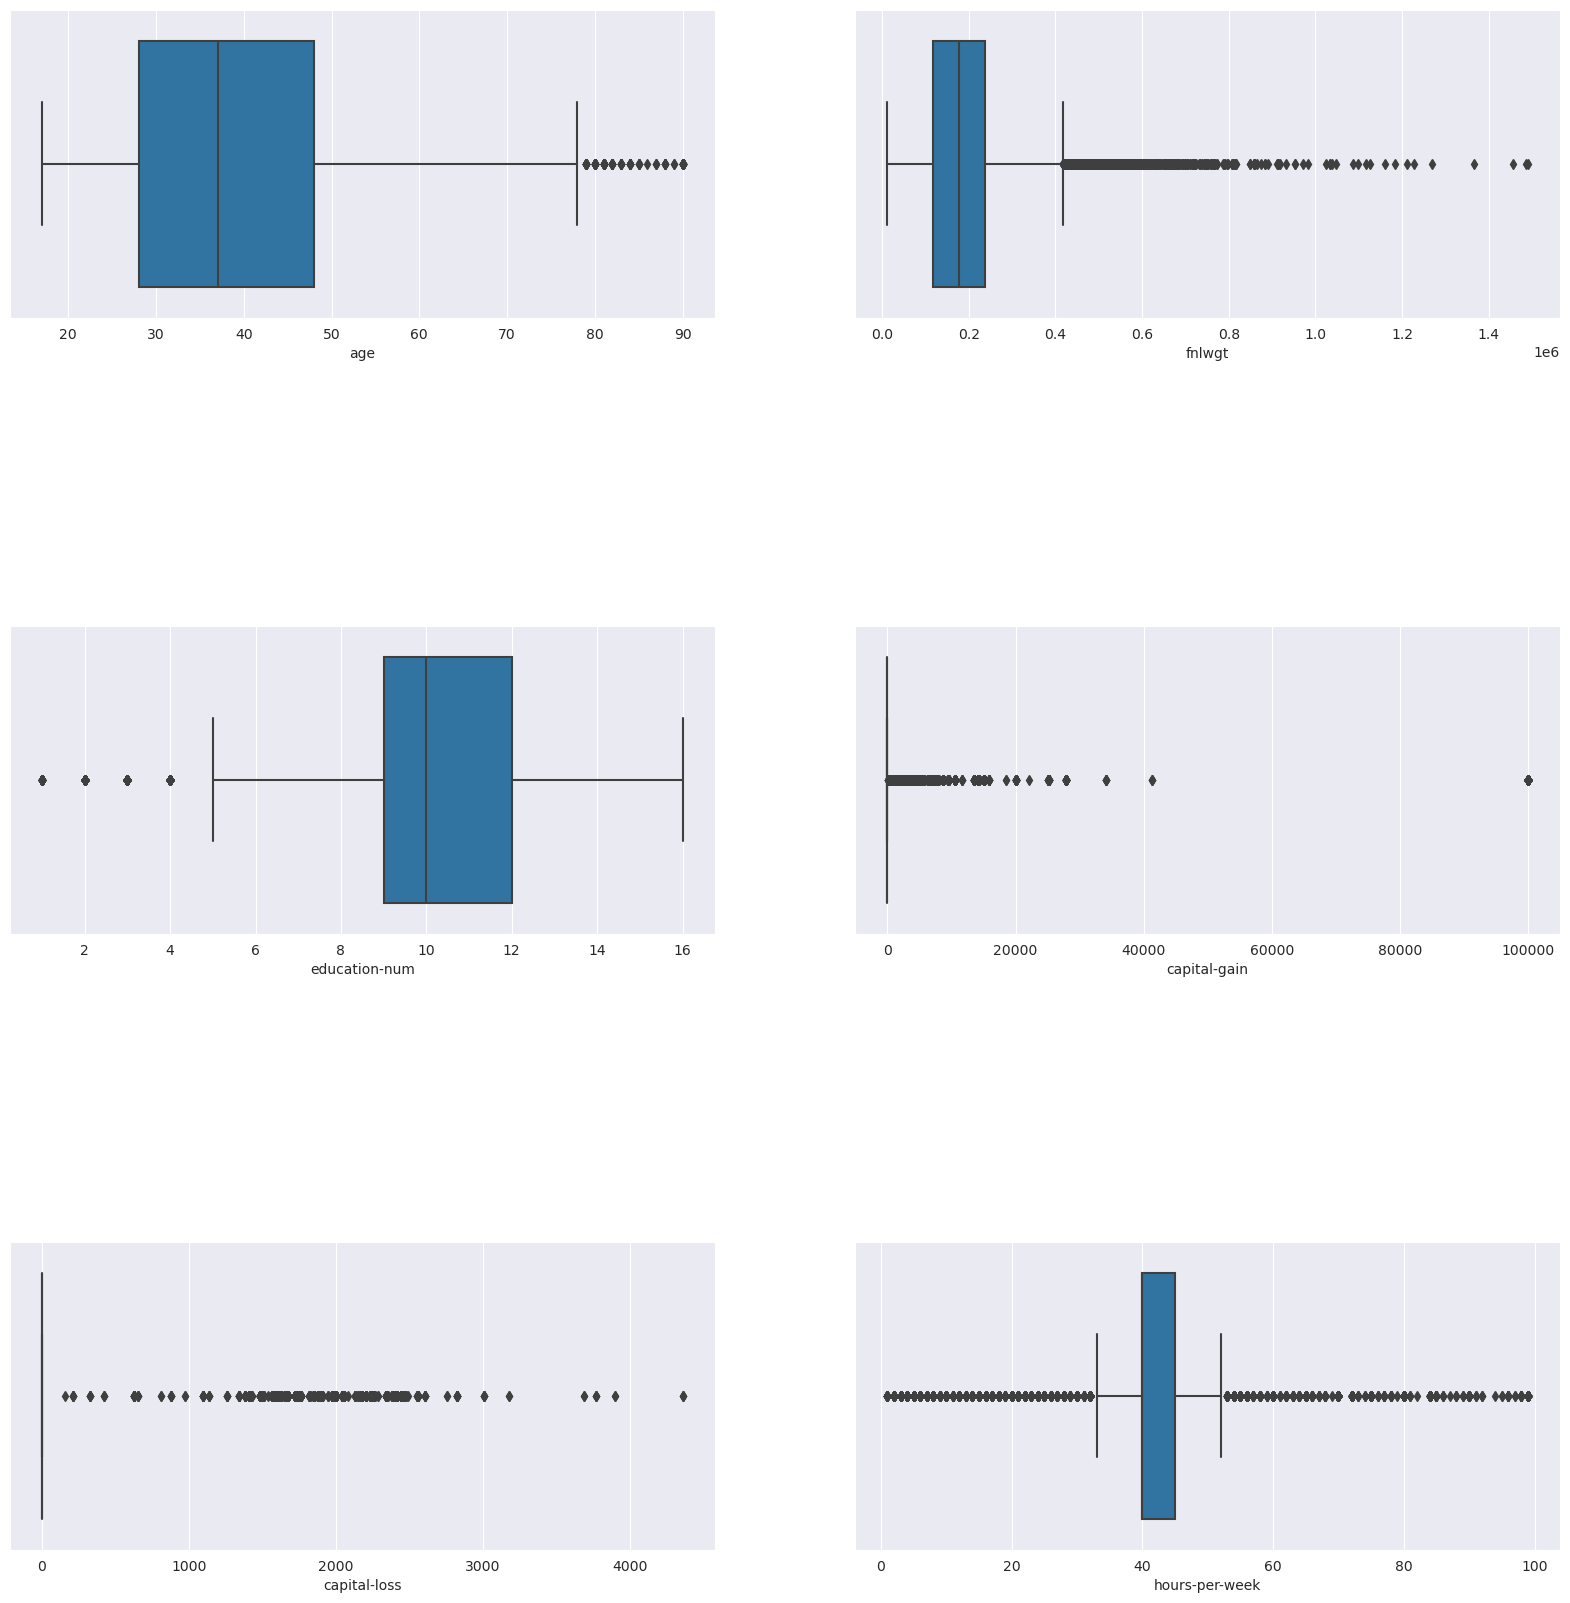

In [14]:
# Iniciemos con gráficas de boxplot
fig, ax = plt.subplots(nrows=round(len(numerical_features)/2), ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace=1)
y = 0
for col in numerical_features:
    i,j = divmod(y, 2)
    sns.boxplot(x=col, data=data, ax=ax[i, j])
    y = y+1

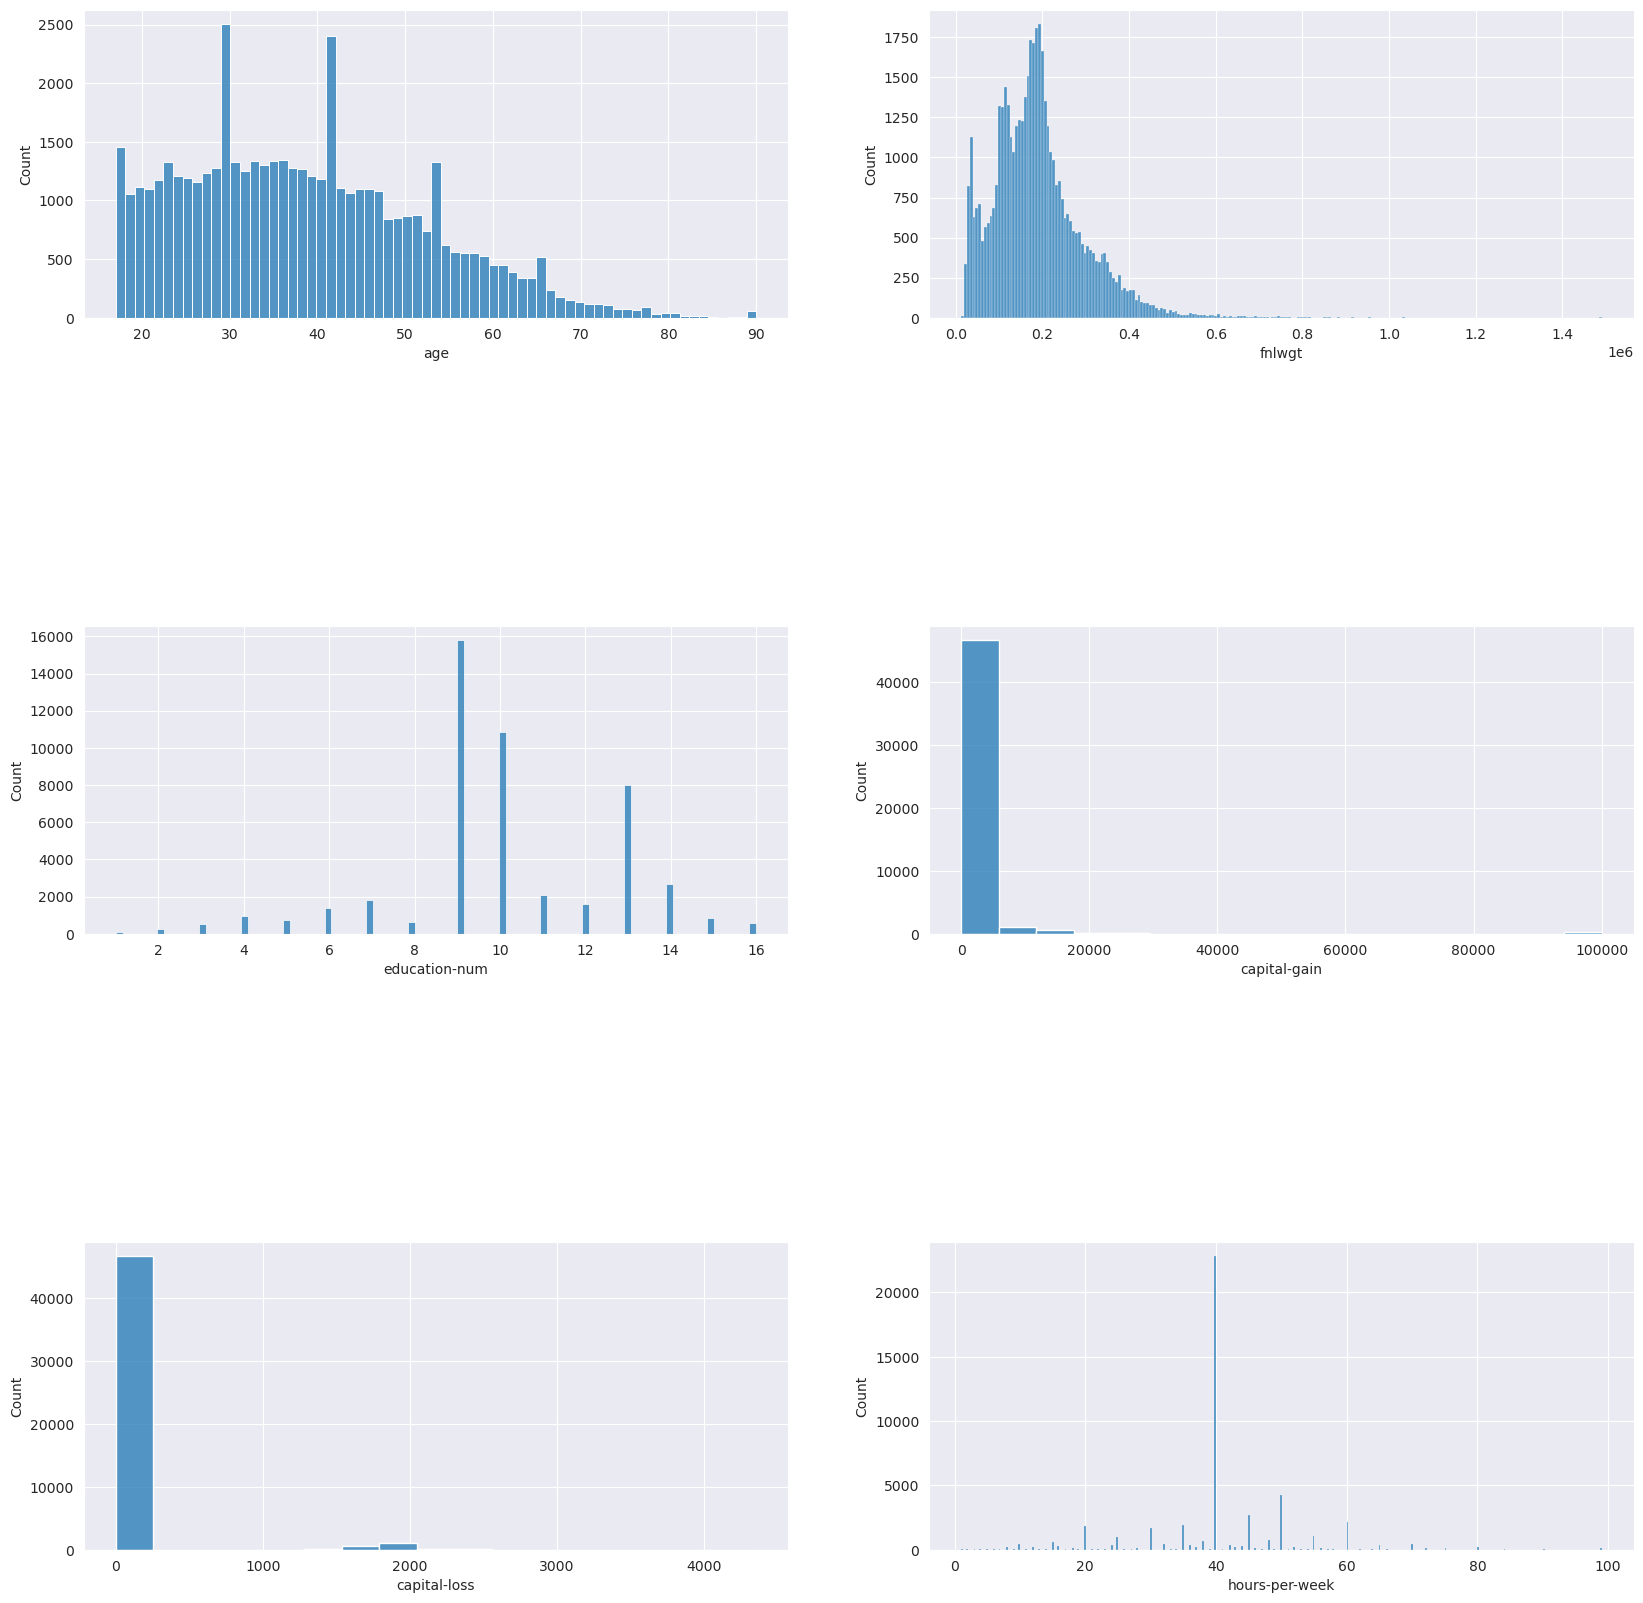

In [16]:
# Ahora analicemos un poco nuestra distribución
fig, ax = plt.subplots(nrows=round(len(numerical_features)/2), ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace=1)
y = 0
for col in numerical_features:
    i,j = divmod(y, 2)
    sns.histplot(x=col, data=data, ax=ax[i, j])
    y = y+1